# Normal Equation

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import time
from sklearn.datasets import load_boston

In [2]:
boston_dataset = load_boston()

/home/gabry/Dataspell/LinearRegression/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Cal

In [3]:
boston_df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston_df['MEDV'] = boston_dataset.target

## Normal Equation definition

$$\large \theta = (X^T X)^{-1}X^Ty$$

In [4]:
def normalEquation(X,y):
    etime = -time.time()
    theta = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)
    etime += time.time()
    etime = np.round(etime*1000,3)
    return theta, etime

### Inverse and Pseudo Inverse Matrix

In [5]:
A = np.array([[1,2,3],[2,4,6],[0,5,7]])
B = np.array([[17,13,3],[2,4,6],[0,5,7]])
np.linalg.det(A)

0.0

In [6]:
#np.linalg.inv(A)

In [7]:
np.linalg.pinv(A)

array([[ 0.19733333,  0.39466667, -0.41333333],
       [-0.01866667, -0.03733333,  0.10666667],
       [ 0.01333333,  0.02666667,  0.06666667]])

In [8]:
np.linalg.det(B)

-186.00000000000009

In [9]:
np.linalg.inv(B)

array([[ 0.01075269,  0.40860215, -0.35483871],
       [ 0.07526882, -0.63978495,  0.51612903],
       [-0.05376344,  0.45698925, -0.22580645]])

In [10]:
np.linalg.pinv(B)

array([[ 0.01075269,  0.40860215, -0.35483871],
       [ 0.07526882, -0.63978495,  0.51612903],
       [-0.05376344,  0.45698925, -0.22580645]])

## Fitting models

In [11]:
selected_feature = 'RM'
#selected_feature = 'LSTAT'
X = boston_df[[selected_feature]]
y = boston_df[["MEDV"]].values

In [12]:
X_linear = np.c_[np.ones((X.shape[0],1)), X]

In [13]:
theta,etime = normalEquation(X_linear,y)

theta value found by normal equation differs from the values found with gradient descend

In [14]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_linear,y)
reg.coef_

array([[0.        , 9.10210898]])

In [15]:
reg.intercept_

array([-34.67062078])

this confirm that normal equation give us the correct result, so changing learning rate to 0.01 in gradient descent we get improvement in the value of theta

## Fitting Polynomial hypotheses through the Normal Equation

In [16]:
def polynomial_features(dataframe, degree):
    df = dataframe.copy()
    feature_name = dataframe.columns[0]
    for i in range(1,degree):
        key = "{}^{}".format(feature_name,i+1)
        df[key] = df[feature_name]**(i+1)
    return df

In [17]:
X_poly_2_scaled = polynomial_features(X,2)
X_poly_3_scaled = polynomial_features(X,3)
X_poly_4_scaled = polynomial_features(X,4)
X_poly_5_scaled = polynomial_features(X,5)
X_poly_6_scaled = polynomial_features(X,6)
X_poly_7_scaled = polynomial_features(X,7)
X_poly_8_scaled = polynomial_features(X,8)

In [18]:
X_poly_2_scaled_int = np.c_[np.ones((X_poly_2_scaled.shape[0],1)),X_poly_2_scaled]
X_poly_3_scaled_int = np.c_[np.ones((X_poly_3_scaled.shape[0],1)),X_poly_3_scaled]
X_poly_4_scaled_int = np.c_[np.ones((X_poly_4_scaled.shape[0],1)),X_poly_4_scaled]
X_poly_5_scaled_int = np.c_[np.ones((X_poly_5_scaled.shape[0],1)),X_poly_5_scaled]
X_poly_6_scaled_int = np.c_[np.ones((X_poly_6_scaled.shape[0],1)),X_poly_6_scaled]
X_poly_7_scaled_int = np.c_[np.ones((X_poly_7_scaled.shape[0],1)),X_poly_7_scaled]
X_poly_8_scaled_int = np.c_[np.ones((X_poly_8_scaled.shape[0],1)),X_poly_8_scaled]

In [19]:
theta_poly2, _ = normalEquation(X_poly_2_scaled_int,y)
theta_poly3, _ = normalEquation(X_poly_3_scaled_int,y)
theta_poly4, _ = normalEquation(X_poly_4_scaled_int,y)
theta_poly5, _ = normalEquation(X_poly_5_scaled_int,y)
theta_poly6, _ = normalEquation(X_poly_6_scaled_int,y)
theta_poly7, _ = normalEquation(X_poly_7_scaled_int,y)
theta_poly8, _ = normalEquation(X_poly_8_scaled_int,y)

## Plot the fitted Hypoteses

In [20]:
X_2,yhat_2 = zip(*sorted(zip(X.values, X_poly_2_scaled_int.dot(theta_poly2))))
X_3,yhat_3 = zip(*sorted(zip(X.values, X_poly_3_scaled_int.dot(theta_poly3))))
X_4,yhat_4 = zip(*sorted(zip(X.values, X_poly_4_scaled_int.dot(theta_poly4))))
X_5,yhat_5 = zip(*sorted(zip(X.values, X_poly_5_scaled_int.dot(theta_poly5))))
X_6,yhat_6 = zip(*sorted(zip(X.values, X_poly_6_scaled_int.dot(theta_poly6))))
X_7,yhat_7 = zip(*sorted(zip(X.values, X_poly_7_scaled_int.dot(theta_poly7))))
X_8,yhat_8 = zip(*sorted(zip(X.values, X_poly_8_scaled_int.dot(theta_poly8))))

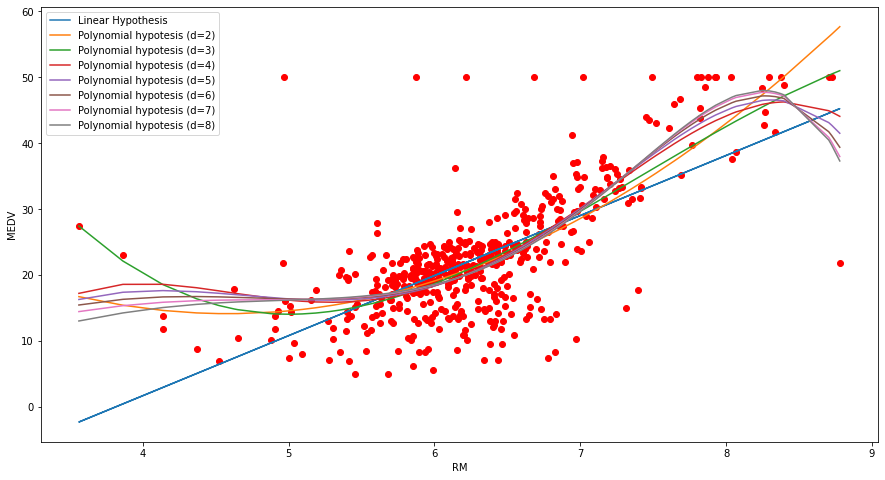

In [21]:
plt.figure(figsize=(15,8))
plt.xlabel(selected_feature)
plt.ylabel('MEDV')
plt.scatter(X,y,c='r')
plt.plot(X.values,X_linear.dot(theta), label = 'Linear Hypothesis')
plt.plot(X_2,yhat_2, label = 'Polynomial hypotesis (d=2)')
plt.plot(X_3,yhat_3, label = 'Polynomial hypotesis (d=3)')
plt.plot(X_4,yhat_4, label = 'Polynomial hypotesis (d=4)')
plt.plot(X_5,yhat_5, label = 'Polynomial hypotesis (d=5)')
plt.plot(X_6,yhat_6, label = 'Polynomial hypotesis (d=6)')
plt.plot(X_7,yhat_7, label = 'Polynomial hypotesis (d=7)')
plt.plot(X_8,yhat_8, label = 'Polynomial hypotesis (d=8)')
plt.legend()
plt.show()